In [1]:
#LIBRARIES

%matplotlib notebook
import numpy as np
import matplotlib as plt

#import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.shape, test.shape

((8693, 14), (4277, 13))

In [5]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [28]:
y = train["Transported"]
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [9]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


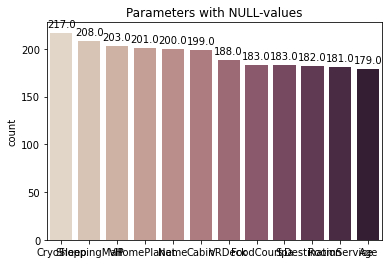

In [12]:
null_values = train.isnull().sum().sort_values(ascending=False).to_frame()
null_values = null_values.loc[null_values[0] != 0]
ax = sns.barplot(x=null_values.index, y=null_values[0], data=null_values,  palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax = ax.set(ylabel="count", title='Parameters with NULL-values')

In [29]:
test.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,4277,4190,4184,4177,4185,4184,4183
unique,4277,3,2,3265,3,2,4176
top,5588_05,Earth,False,G/160/P,TRAPPIST-1e,False,Cints Erle
freq,1,2263,2640,8,2956,4110,2


<AxesSubplot:>

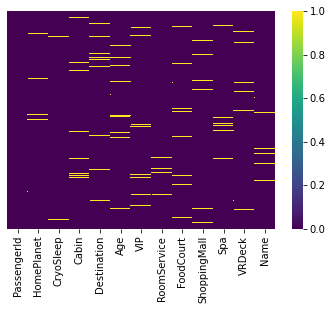

In [9]:
sns.heatmap(test.isnull(),yticklabels= False,cmap='viridis')

In [7]:
cols_with_missing = [col for col in train.columns
                            if train[col].isnull().any()]

In [8]:
cols_with_missing

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name']

In [14]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [33]:
X = train.iloc[:, 0:13]
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [42]:
df_num= X.select_dtypes(exclude= "object")
df_cat= X.select_dtypes(include= "object")
print(df_num)
print(df_cat)

       Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0     39.0          0.0        0.0           0.0     0.0     0.0
1     24.0        109.0        9.0          25.0   549.0    44.0
2     58.0         43.0     3576.0           0.0  6715.0    49.0
3     33.0          0.0     1283.0         371.0  3329.0   193.0
4     16.0        303.0       70.0         151.0   565.0     2.0
...    ...          ...        ...           ...     ...     ...
8688  41.0          0.0     6819.0           0.0  1643.0    74.0
8689  18.0          0.0        0.0           0.0     0.0     0.0
8690  26.0          0.0        0.0        1872.0     1.0     0.0
8691  32.0          0.0     1049.0           0.0   353.0  3235.0
8692  44.0        126.0     4688.0           0.0     0.0    12.0

[8693 rows x 6 columns]
     PassengerId HomePlanet CryoSleep     Cabin    Destination    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  False   
1        0002_01      Earth     False     F/0/S  

In [41]:
df_catlist = df_cat.columns.tolist()
df_catlist

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [49]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer
# Different types of imputers
mean_imputer = SimpleImputer(strategy= 'mean')
frequent_imputer = SimpleImputer(strategy= 'most_frequent')
# Imputation
df = pd.DataFrame(mean_imputer.fit_transform(df_num))
df.columns= df_num.columns
dfc = pd.DataFrame(frequent_imputer.fit_transform(df_cat))
dfc.columns= df_cat.columns


In [51]:
print(df.isnull().sum())
print(dfc.isnull().sum())

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64
PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
Name           0
dtype: int64


In [53]:
del dfc["Name"]
dfc

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False
...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False


In [60]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()
# Encode a categorical feature
#df['cat_encoded'] = le.fit_transform(df['cat'])
dfc= dfc.apply(le.fit_transform)

In [61]:
dfc

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,0,1,0,149,2,0
1,1,0,0,2184,2,0
2,2,1,0,1,2,1
3,3,1,0,1,2,0
4,4,0,0,2186,2,0
...,...,...,...,...,...,...
8688,8688,1,0,146,0,1
8689,8689,0,1,5280,1,0
8690,8690,0,0,5285,2,0
8691,8691,1,0,2131,0,0


In [69]:
dfc["Cabin"].unique()

array([ 149, 2184,    1, ..., 5280, 5285, 2131])

In [70]:
y = le.fit_transform(y)

In [75]:
y= pd.DataFrame(y)
y

,0
0,0
1,1
2,0
3,0
4,1
...,...
8688,0
8689,0
8690,1
8691,0


In [78]:
df_new= pd.merge(dfc, df, how='outer', left_index=True, right_index=True)

In [79]:
df_new

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,0,149,2,0,39.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,2184,2,0,24.0,109.0,9.0,25.0,549.0,44.0
2,2,1,0,1,2,1,58.0,43.0,3576.0,0.0,6715.0,49.0
3,3,1,0,1,2,0,33.0,0.0,1283.0,371.0,3329.0,193.0
4,4,0,0,2186,2,0,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8688,1,0,146,0,1,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,8689,0,1,5280,1,0,18.0,0.0,0.0,0.0,0.0,0.0
8690,8690,0,0,5285,2,0,26.0,0.0,0.0,1872.0,1.0,0.0
8691,8691,1,0,2131,0,0,32.0,0.0,1049.0,0.0,353.0,3235.0


In [81]:
#split train/test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (df_new, y, random_state = 0)



#logistic regression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0, solver = "lbfgs").fit(X_train, y_train)
y_preds = clf.predict(X_test)
print ("accuracy: {:.3f}".format(accuracy_score(y_test, y_preds)))

accuracy: 0.782


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train,y_train)
y_pre = clf.predict(X_test)
print ("accuracy: {:.3f}".format(accuracy_score(y_test, y_pre)))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

reg = RandomForestClassifier(n_estimators = 10, max_depth= 4,  random_state = 0).fit(X_train, y_train)

y_pred = reg.predict(X_test)

print ("accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))
